# Exact confidence interval for a difference between normal means

**date**
: 2021-04-16

**data**
: `skulls.csv`

**module.function**
: `scipy.stats.t`

**ref**
: Computer book B, Activity 22

**desc**
: Calculating an exact confidence interval for a difference between two normal means

## Import the modules

In [1]:
import src.load
from scipy.stats import t, probplot
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

## Import the data

In [2]:
sample = src.load.skulls()

In [3]:
sample.head()

,Etruscans,Italians
0,141,133.0
1,148,138.0
2,132,130.0
3,138,138.0
4,154,134.0


In [4]:
# declare two local vars for easier coding
# use dropna as data is not equal length
etr = sample["Etruscans"].dropna()
ita = sample["Italians"].dropna()

## Check normality

Use a normal probability plot to check for normality.

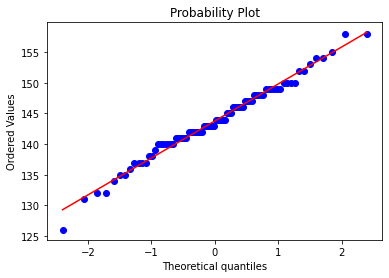

In [5]:
# check etruscans skulls
f, ax = plt.subplots()

probplot(
    x=etr,
    plot=ax
)

plt.show()

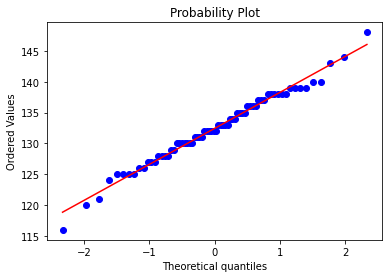

In [6]:
# check italisan skulls
f, ax = plt.subplots()
probplot(
    x=ita,
    plot=ax
)
plt.show()

Both probability plots follow a straight line, so the assumption of normality is satisfied.

## Check for a common sample variance

In [7]:
if ita.var() > etr.var():
    print(f"{ita.var() / etr.var()}")
else:
    print(f"{etr.var() / ita.var()}")

1.078190046662236


As the ratio is less than 3, a common variance is appropriate to be assumed.

## Calculate an exact 95% confidence interval

(This is a pain of a script.)

We need:

- `mu_diff` (difference betwee the means) $\overline{X}_{1} - \overline{X}_{2}$
- `df` (degrees of freedom): $n_{1}+n_{2}-2$
- `ese`: pooled estimate of the estimate standard error:
$S_{P} \sqrt{\frac{1}{n_{1}} + \frac{1}{n_{2}}}$

In [8]:
# difference between the means
mu_diff = etr.mean() - ita.mean()

In [9]:
# dof
dof = etr.size + ita.size - 2

In [10]:
# pooled est numerator
num_pooled_var = ((etr.size - 1) * etr.var() + (ita.size -1) * ita.var())
ese = sqrt(num_pooled_var / dof) * sqrt(1/etr.size + 1/ita.size)

In [11]:
# calculate the ci
t.interval(
    alpha=0.95,
    df=dof,
    loc=mu_diff,
    scale=ese
)

(9.453650451007142, 13.208254310897594)

In [12]:
help(t.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(alpha, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Confidence interval with equal areas around the median.
    
    Parameters
    ----------
    alpha : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.

